<a href="https://colab.research.google.com/github/rhatiro/bootcamp-cdp-set2022/blob/main/Heart_Attack_Analysis_Desafio_Bootcamp_CDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto de Machine Learning para competição do Bootcamp CDP**
###*CIENTISTA DE DADOS NA PRÁTICA*
#####Desafio das aulas realizadas nos dias 26, 28 e 30 de Setembro de 2022
#####**Aluno:** Roberto Hatiro

#**Heart Attack Analysis & Prediction Dataset**

*A dataset for heart attack classification*

**Dataset:** heart.csv

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

**Estudo para consulta adicional:**

https://www.scielo.br/j/pope/a/JPjXTjHcNQJHFsxctRG3gPf/?lang=pt

### ***Objetivo do projeto:*** 
Construir uma máquina preditiva capaz de analisar o risco de ocorrer um ataque cardíaco de acordo com as variáveis disponibilizadas.

##*0. Aprendizado supervisionado*

###**Descrição da base de dados**

* **idade (age):** Idade do paciente;

* **sexo (sex):** Sexo do paciente:
          0: feminino;
          1: masculino.

* **tipo_dor_peito (cp):** Tipo de dor no peito:
          1: angina típica;
          2: angina atípica;
          3: sem dor anginal;
          4: assintomático.

* **pressao (trtbps):** Pressão arterial de repouso TRESTBPS medida em mmHg;

* **colesterol (chol):** Colesterol no soro sangüíneo em mg/dl obtido através do sensor de IMC;

* **fbs (fbs):** Concentração de açucar no sangue:
          0: glicose de jejum < 120 mg/dl;
          1: glicose de jejum > 120 mg/dl.

* **rest_ecg (restecg):** Resultado da eletrocardiografia em repouso (ECG de repouso)
          0: normal;
          1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV);
          2: mostrando provável (ou definitiva) hipertrofia do ventrículo esquerdo pelos critérios de Romhilt-Estes.

* **thalach (thalachh):** Taxa máxima de batimento cardíaco atingida;

* **exang (exng):** Dor no peito causada por exercício:
          0: não;
          1: sim.

* **oldpeak (oldpeak):** Depressão ST induzida por exercício relativamente sossegado;

* **slope (slp):** Inclinação da extremidade do segmento ST no exercício (SLOPE):
          0: Inclinado para cima;
          1: Plano;
          2: Inclinado para baixo.

* **ca (caa):** Número de vasos coloridos pela fluoroscopia (CA) - valor de 0 a 3;

* **thal (thall):** Talassemias;

* **resultado (output): Variável de TARGET:**
          0 = menos chance de ataque cardíaco;
          1 = mais chance de ataque cardíaco.

##*1. Instalação e Importação*

In [253]:
# Carregando arquivo csv usando Pandas
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns

# Pré-Processamento
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from sklearn.model_selection import train_test_split

# Máquinas Preditivas
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [254]:
# Lazy Predict
# Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.
# https://pypi.org/project/lazypredict/

!pip install lazypredict

import lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [255]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
arquivo = ('/content/drive/MyDrive/Bootcamp CDP - Dias 26, 28 e 30 de Setembro/Datasets/Heart Attack Analysis & Prediction Dataset/heart.csv')
colunas = ['idade', 'sexo', 'tipo_dor_peito', 'pressao', 'colesterol', 'fbs', 'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'resultado']

##*2. Análise exploratória dos dados*

In [257]:
# Leitura do dataset e visualização inicial do dataset
dados = pd.read_csv(arquivo, names = colunas)
dados.head()

,idade,sexo,tipo_dor_peito,pressao,colesterol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,resultado
0,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [258]:
dados.shape

(304, 14)

In [259]:
dados.dtypes

idade             object
sexo              object
tipo_dor_peito    object
pressao           object
colesterol        object
fbs               object
rest_ecg          object
thalach           object
exang             object
oldpeak           object
slope             object
ca                object
thal              object
resultado         object
dtype: object

In [260]:
# Remoção da primeira coluna de nome que foi alterada
dados = dados.iloc[1:,:]

# Conversão dos tipos de colunas
dados = dados.astype({
    'idade': 'int',
    'sexo': 'int',
    'tipo_dor_peito': 'int',
    'pressao': 'int',
    'colesterol': 'int',
    'fbs': 'int',
    'rest_ecg': 'int',
    'thalach': 'int',
    'exang': 'int',
    'oldpeak': 'float',
    'slope': 'int',
    'ca': 'int',
    'thal': 'int',
    'resultado': 'int'
    })
print(dados.shape)

(303, 14)


### Estatística Descritiva

In [261]:
# Visualizando as primeiras 20 linhas
dados.head(20)

,idade,sexo,tipo_dor_peito,pressao,colesterol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,resultado
1,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.40,1,0,1,1
7,56,0,1,140,294,0,0,153,0,1.30,1,0,2,1
8,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
9,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
10,57,1,2,150,168,0,1,174,0,1.60,2,0,2,1


In [262]:
# Visualizando as primeiras e últimas linhas
dados

,idade,sexo,tipo_dor_peito,pressao,colesterol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,resultado
1,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


In [263]:
# Visualizando as dimensões
dados.shape

(303, 14)

In [264]:
# Tipo de dados de cada atributo
dados.dtypes

idade               int64
sexo                int64
tipo_dor_peito      int64
pressao             int64
colesterol          int64
fbs                 int64
rest_ecg            int64
thalach             int64
exang               int64
oldpeak           float64
slope               int64
ca                  int64
thal                int64
resultado           int64
dtype: object

In [265]:
# Sumário estatístico
dados.describe()

,idade,sexo,tipo_dor_peito,pressao,colesterol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,resultado
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [266]:
# Distribuição das classes
dados.groupby('resultado').size()

resultado
0    138
1    165
dtype: int64

In [267]:
# Correlação de Pearson
dados.corr(method = 'pearson')

,idade,sexo,tipo_dor_peito,pressao,colesterol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,resultado
idade,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sexo,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
tipo_dor_peito,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
pressao,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
colesterol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
rest_ecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


In [268]:
# Verificando o skew de cada atributo
dados.skew()

idade            -0.20
sexo             -0.79
tipo_dor_peito    0.48
pressao           0.71
colesterol        1.14
fbs               1.99
rest_ecg          0.16
thalach          -0.54
exang             0.74
oldpeak           1.27
slope            -0.51
ca                1.31
thal             -0.48
resultado        -0.18
dtype: float64

### Visualização com Matplotlib

In [269]:
import matplotlib.pyplot as plt
%matplotlib inline

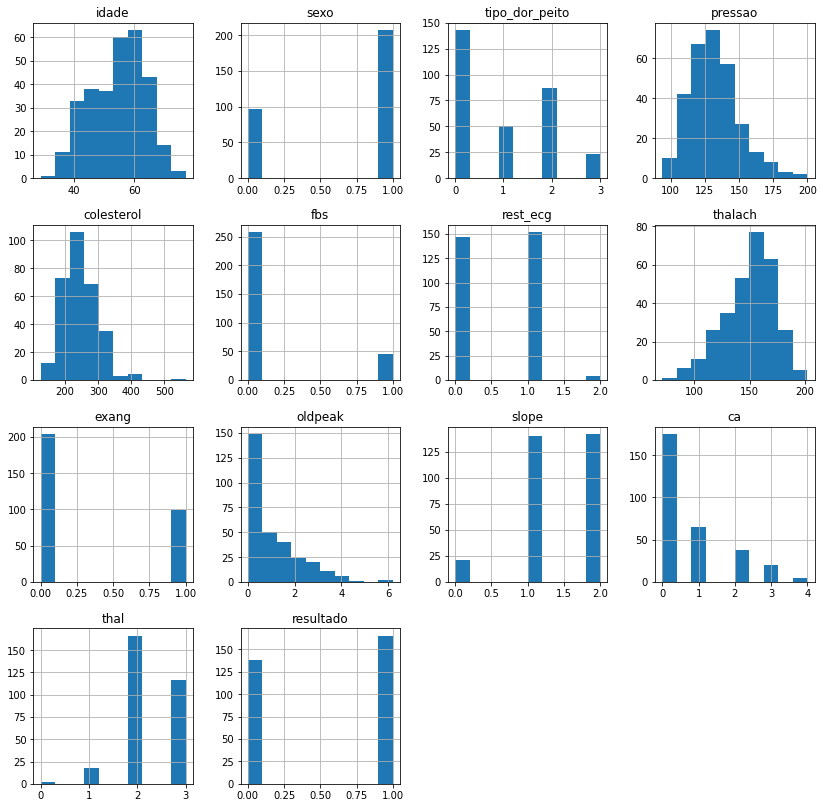

In [270]:
# Histograma Univariado
dados.hist(figsize = (14, 14))
plt.show()

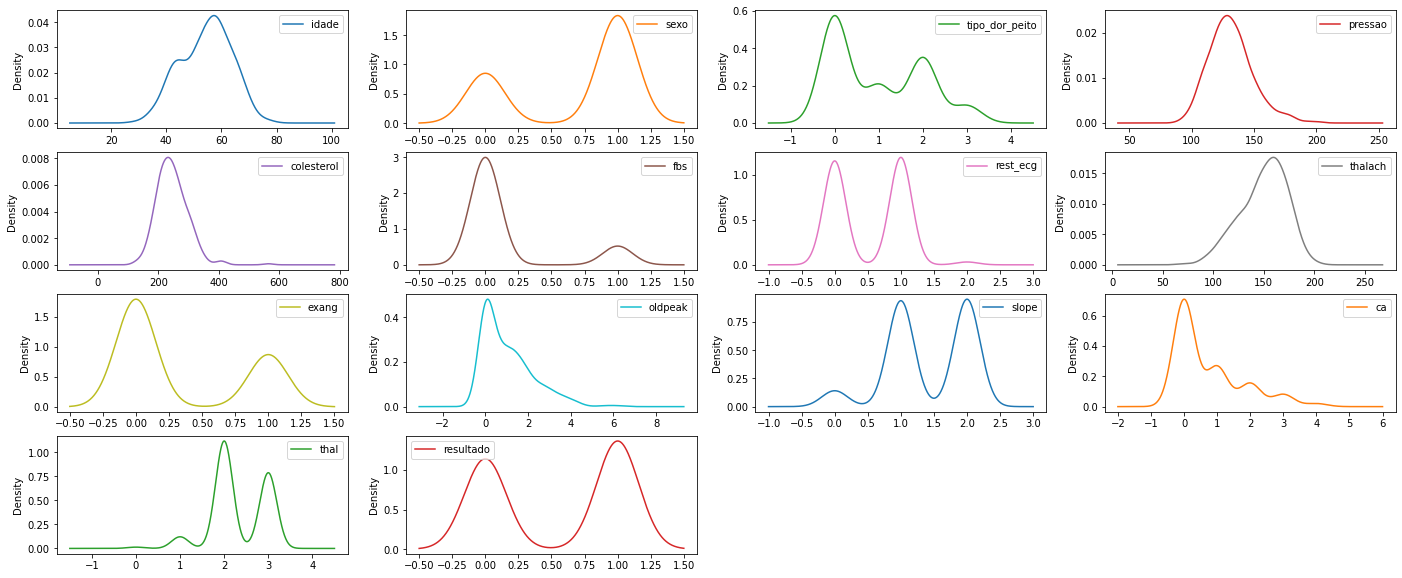

In [271]:
# Density Plot Univariado
dados.plot(figsize = (24, 10), kind = 'density', subplots = True, layout = (4,4), sharex = False)
plt.show()

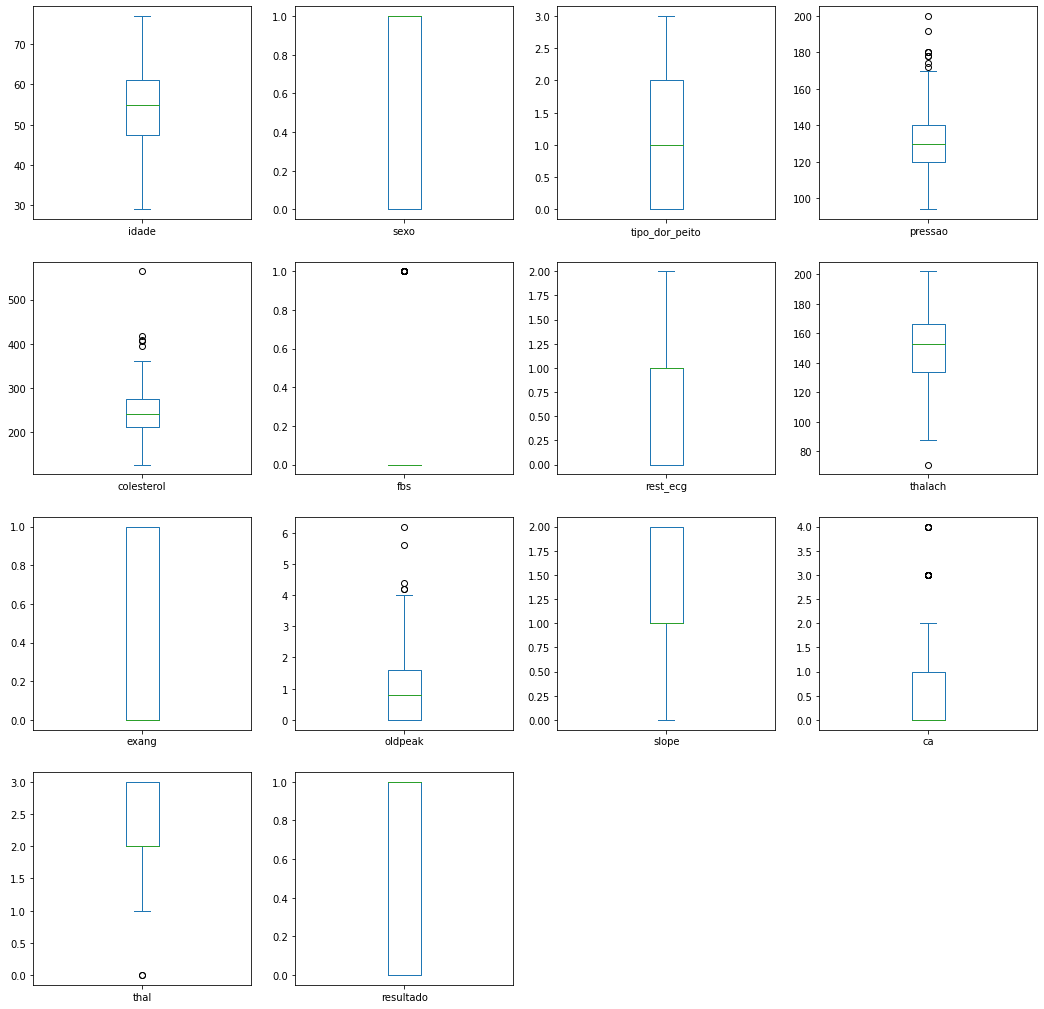

In [272]:
# Box and Whisker Plots
dados.plot(figsize = (18, 18), kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False)
plt.show()

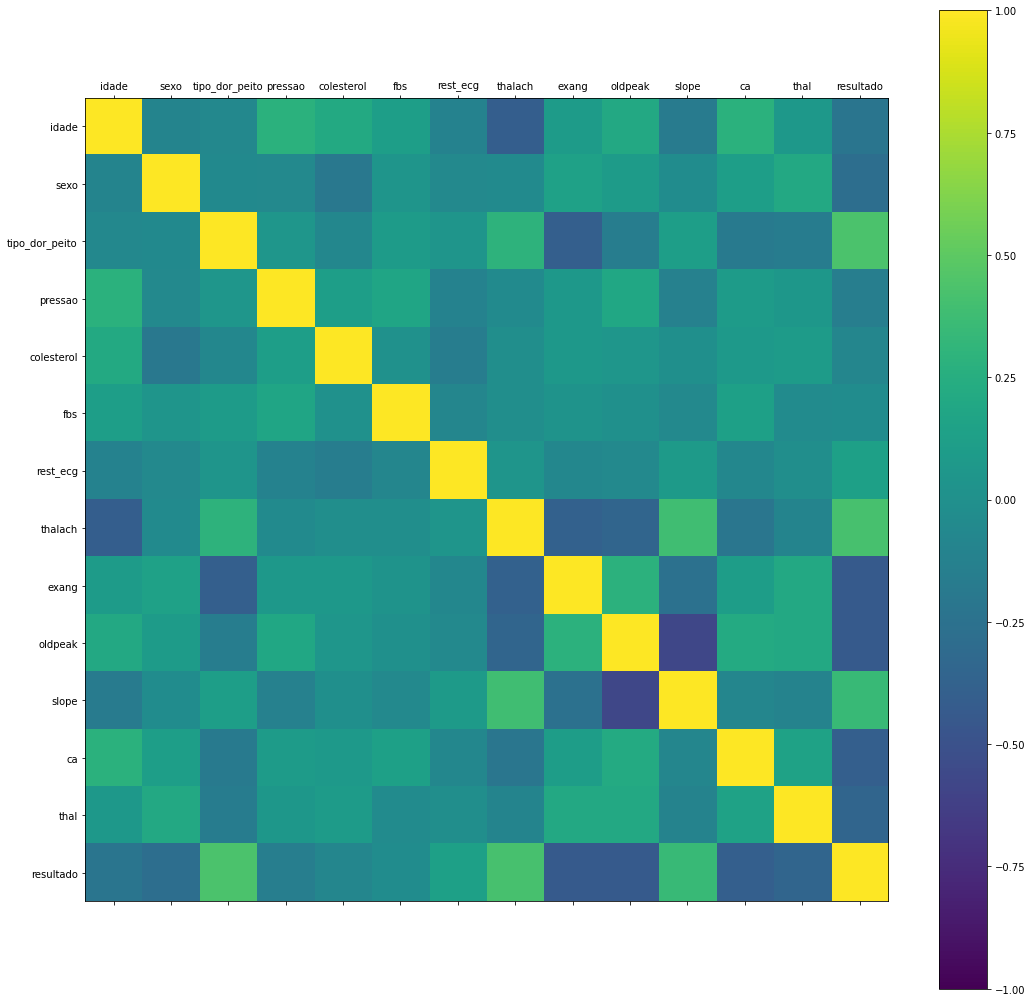

In [273]:
# Matriz de Correlação com nomes das variáveis
correlations = dados.corr()

# Plot
import numpy as np
fig = plt.figure(figsize = (18, 18))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dados.columns)
ax.set_yticklabels(dados.columns)
plt.show()

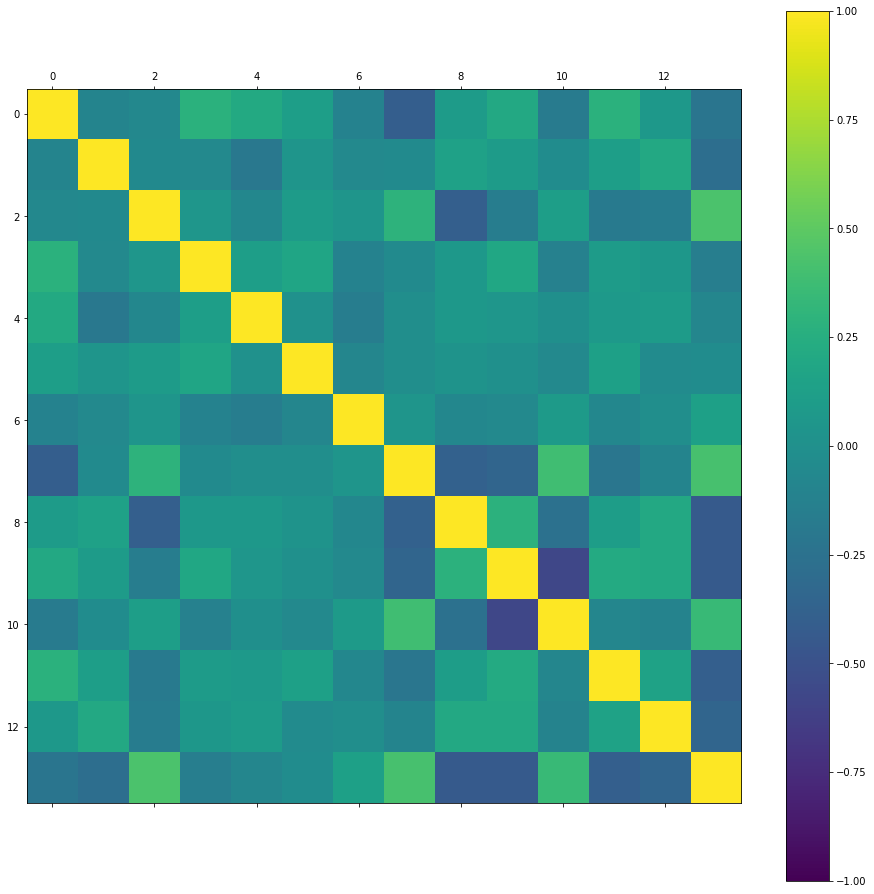

In [274]:
# Matriz de Correlação genérica
correlations = dados.corr()

# Plot
fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

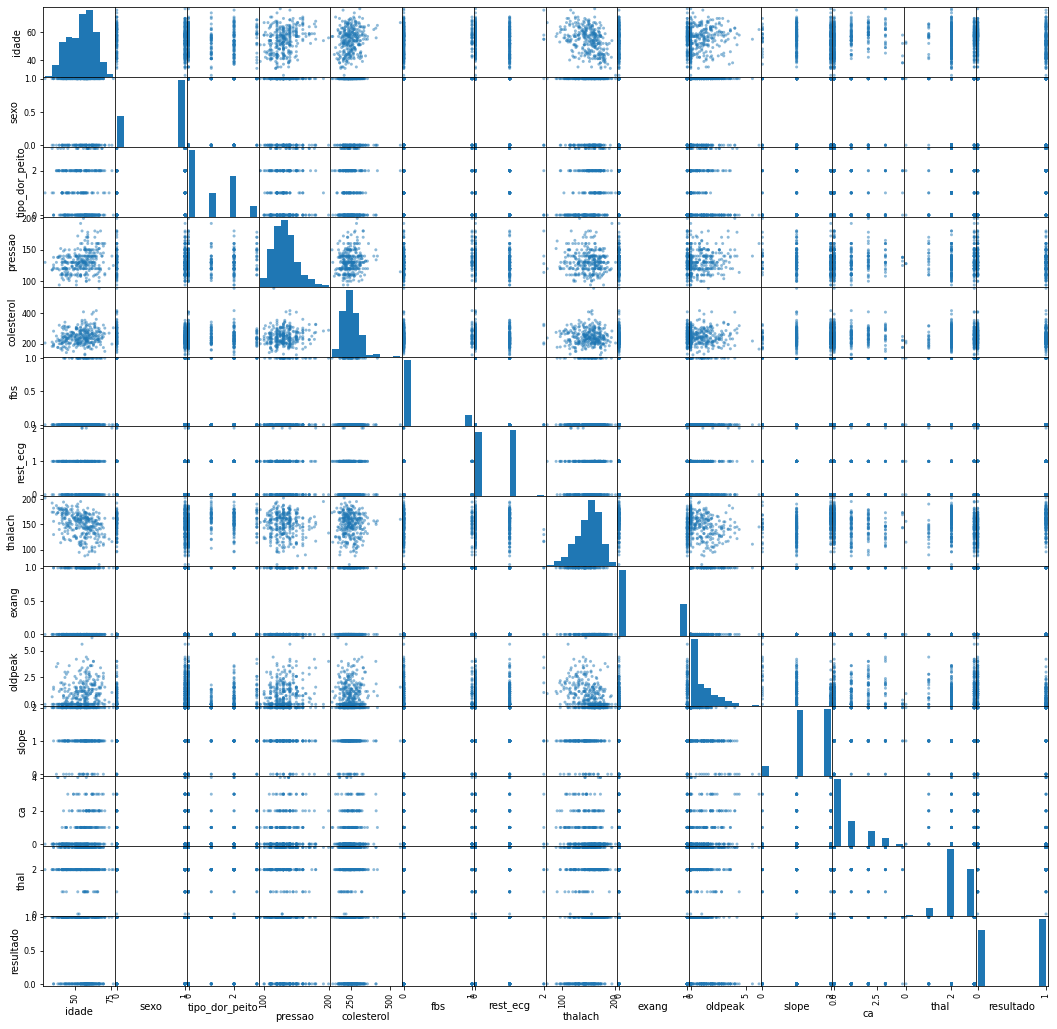

In [275]:
# Scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(dados, figsize = (18, 18))
plt.show()

### Visualização com Seaborn

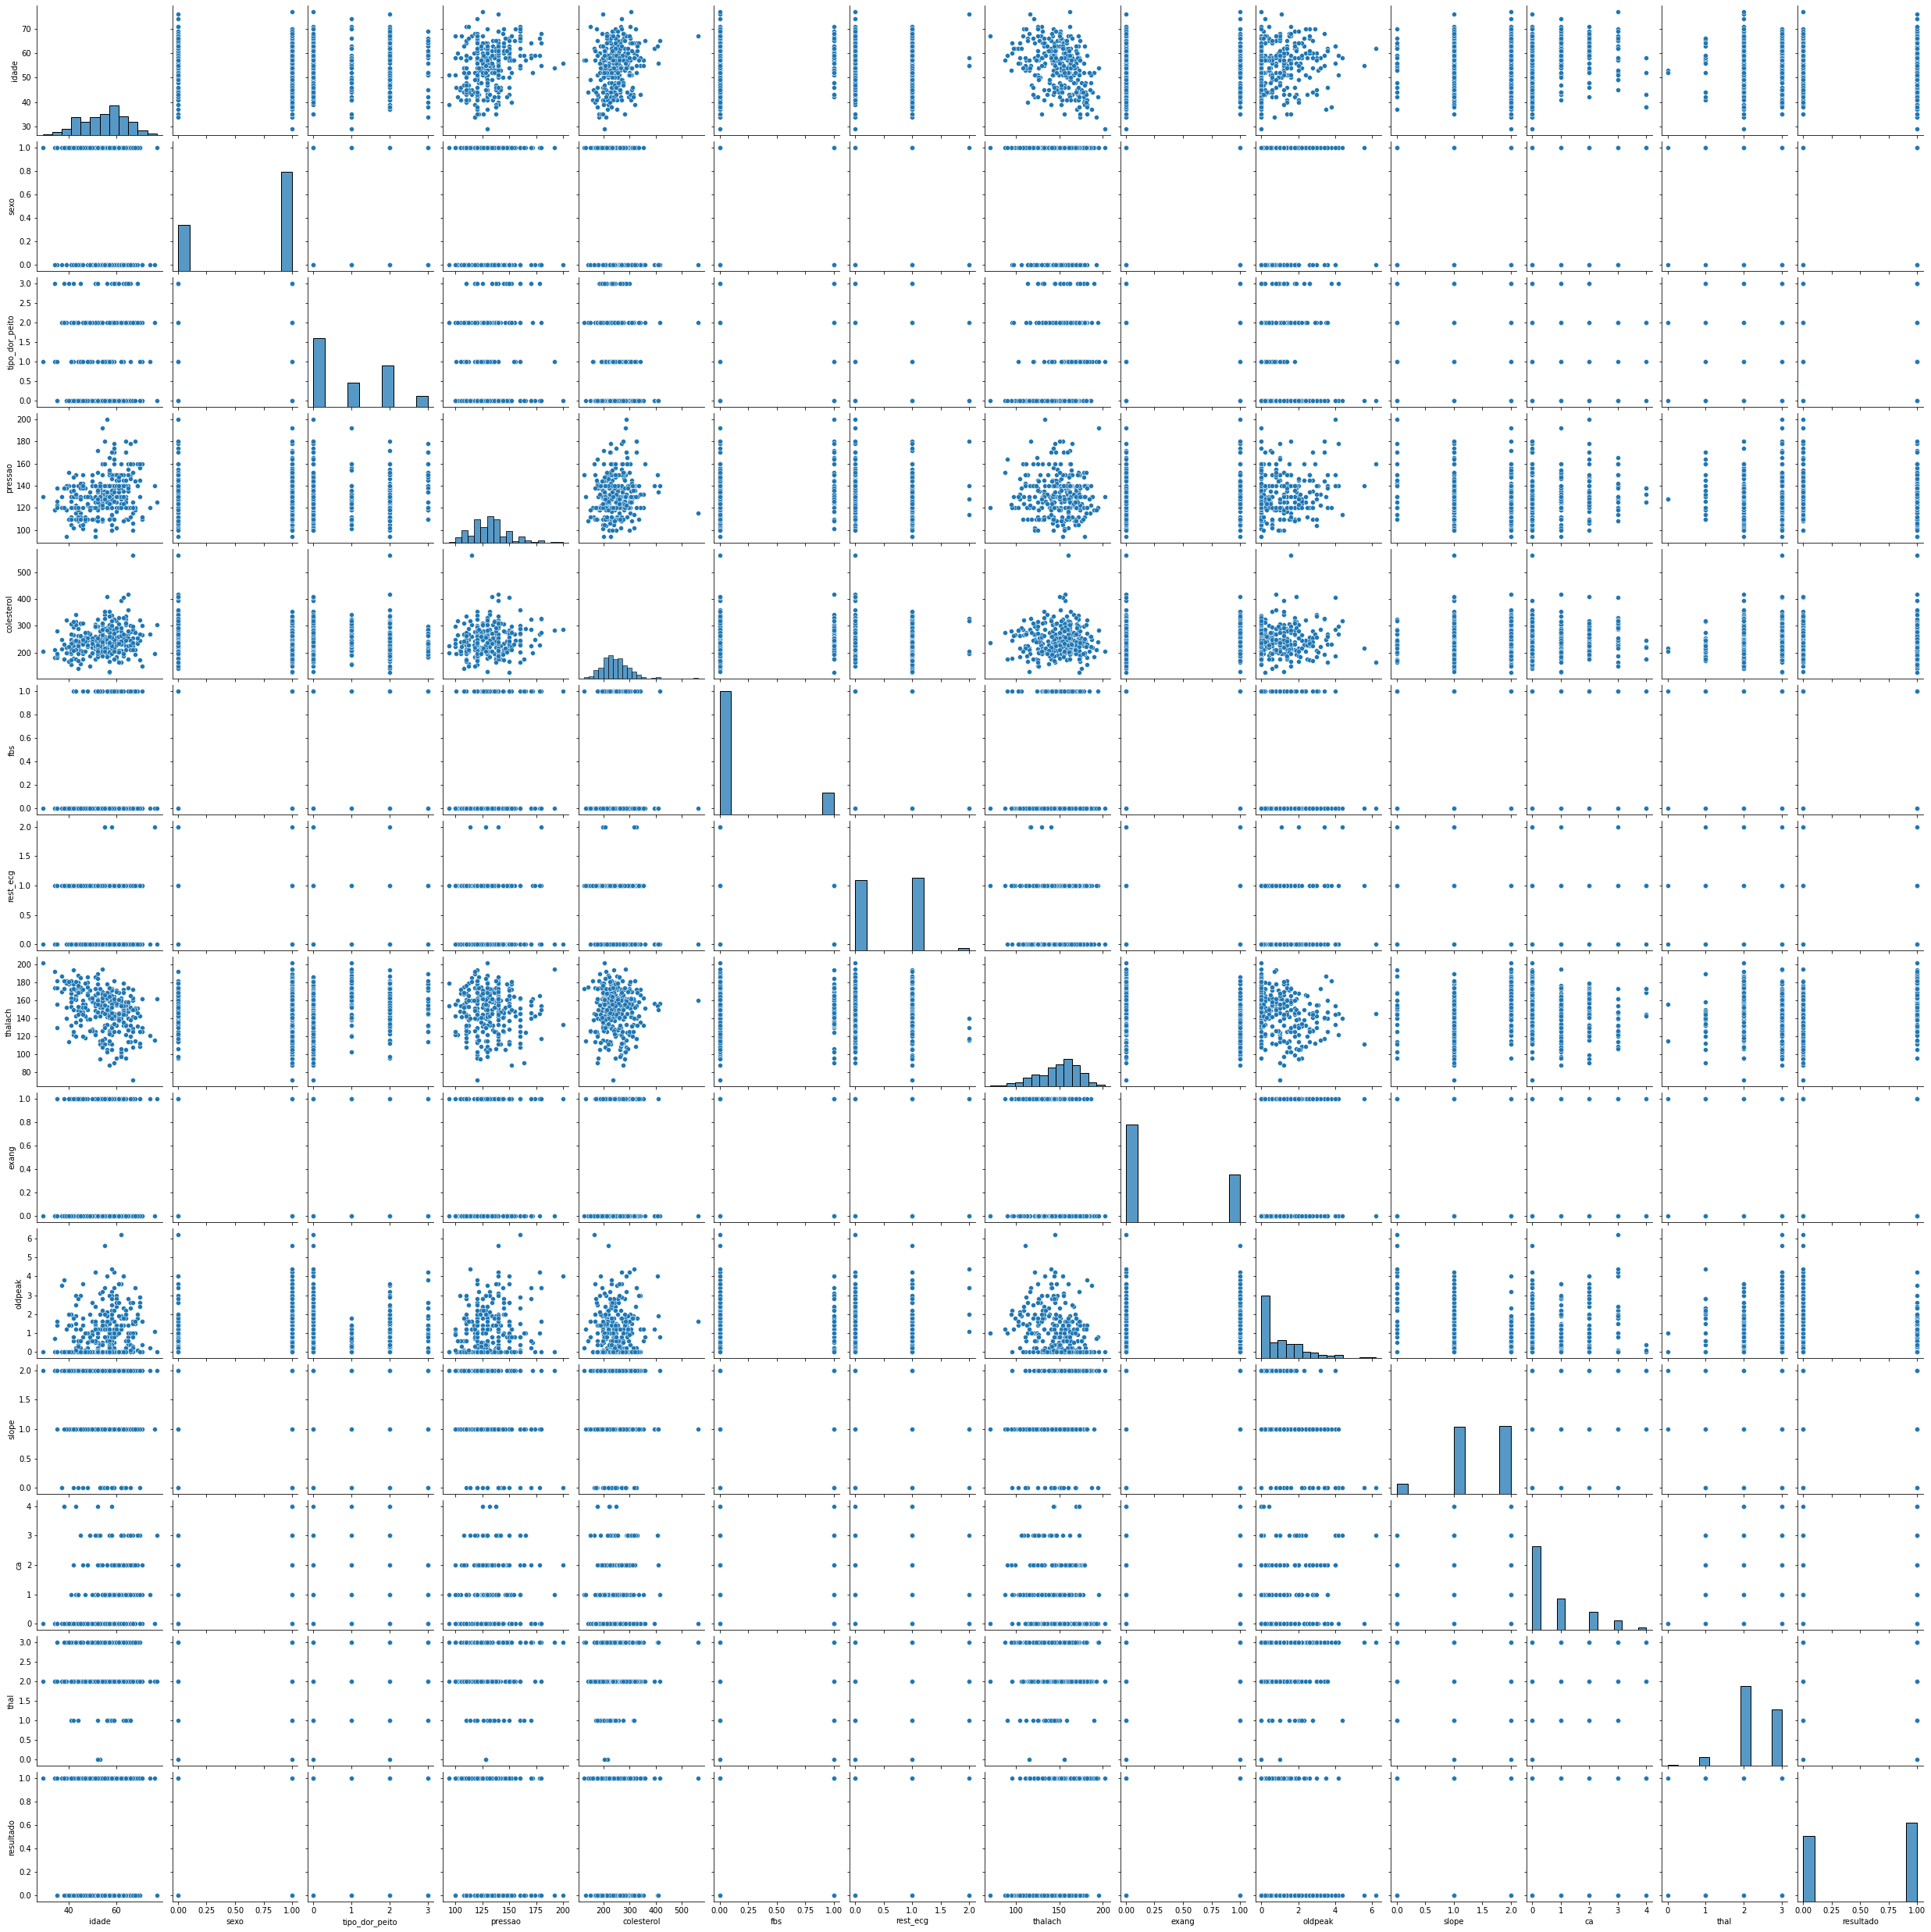

In [276]:
# Pairplot
sns.pairplot(dados)

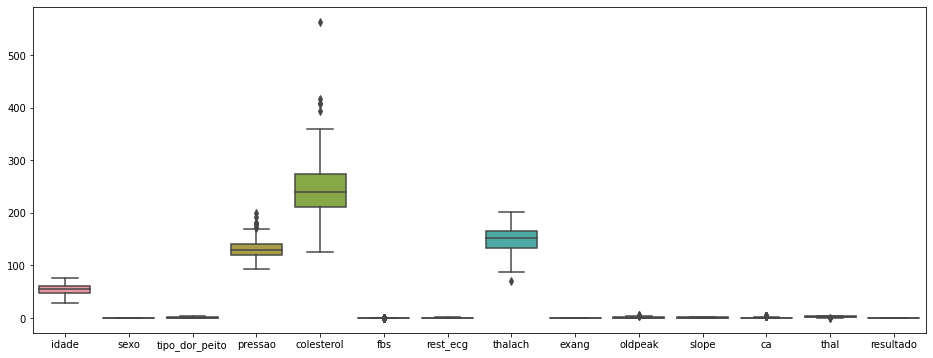

In [277]:
# Boxplot com orientação vertical
plt.figure(figsize = (16, 6))
sns.boxplot(data = dados, orient = 'v')

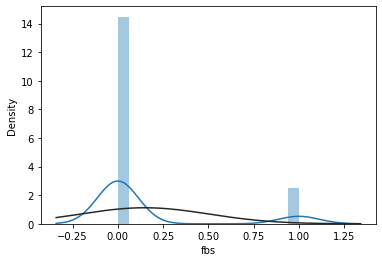

In [278]:
from scipy import stats
sns.distplot(dados.fbs, fit = stats.norm)

##*3. Pré-Processamento - Preparando os dados para Machine Learning*

### Normalização - Método 1

In [279]:
# Carregando os dados
array = dados.values

In [280]:
# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:13]
Y = array[:,13]

In [281]:
# Transformando os dados para a mesma escala (entre 0 e 1)
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

In [282]:
dados.describe()

,idade,sexo,tipo_dor_peito,pressao,colesterol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,resultado
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [283]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]]

Dados Normalizados: 

 [[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]


##*4. Construção da Máquina Preditiva com Machine Learning*

In [284]:
# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.12
seed = 2

In [285]:
# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [286]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
modelo, predictions = clf.fit(X_treino, X_teste, y_treino, y_teste)

print(modelo)

100%|██████████| 29/29 [00:00<00:00, 30.10it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.95               0.95     0.95      0.95   
BernoulliNB                        0.95               0.95     0.95      0.95   
GaussianNB                         0.95               0.95     0.95      0.95   
LinearSVC                          0.92               0.92     0.92      0.92   
LinearDiscriminantAnalysis         0.92               0.92     0.92      0.92   
XGBClassifier                      0.92               0.92     0.92      0.92   
RidgeClassifierCV                  0.92               0.92     0.92      0.92   
RidgeClassifier                    0.92               0.92     0.92      0.92   
LogisticRegression                 0.92               0.92     0.92      0.92   
LGBMClassifier                     0.92               0.92     0.92      0.92   
CalibratedClassifierCV      

In [287]:
# Importando modelos alternativos para o desafio

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.ensemble import ExtraTreesClassifier

In [288]:
# Criando o modelo
#modelo = XGBClassifier()

# Testando modelos alternativos de acordo com o desafio
#modelo = RandomForestClassifier()
#modelo = KNN()
#modelo = SVM()

modelo = ExtraTreesClassifier()

In [289]:
# Treinando o modelo
modelo.fit(X_treino, y_treino)

ExtraTreesClassifier()

In [290]:
# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

In [291]:
# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 94.59%
